<a href="https://colab.research.google.com/github/adhish-bahl/2347203_NNDL_Lab/blob/main/2347203_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Importing Libraries**

In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

#### **Loading Dataset**

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df = pd.read_csv('/content/drive/MyDrive/Trimester5/NNDL/Lab/Lab6/AppleHistoricalQuotes.csv')

In [27]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [28]:
df.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

#### **1) Data Preprocessing:**

**Removing '$' symbol and converting strinf to float**

In [29]:
df[' Close/Last'] = df[' Close/Last'].replace({'\$': ''}, regex=True).astype(float)

**Focus on the 'Close' column**

In [30]:
close_data = df[' Close/Last'].values.reshape(-1, 1)

**Normalize the data**

In [31]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_data = scaler.fit_transform(close_data)

**Split the dataset into training (80%) and testing sets (20%)**

In [32]:
train_size = int(len(scaled_close_data) * 0.8)
train_data = scaled_close_data[:train_size]
test_data = scaled_close_data[train_size:]

#### **2) Create Training Sequences:**

In [33]:
def create_sequences(data, sequence_length=60):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

#### **3) Build the RNN Model:**

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Using an RNN model for stock price prediction allows for effective analysis of historical stock trends by retaining past information across sequential data. This approach captures both short-term fluctuations and longer-term patterns, making it a solid choice for time series predictions like stock prices.

#### **4) Train the Model:**

In [35]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0034 - val_loss: 4.6110e-05
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0764e-04 - val_loss: 3.8509e-05
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2873e-04 - val_loss: 4.1219e-05
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.6150e-04 - val_loss: 2.9398e-05
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.2867e-04 - val_loss: 2.9440e-05
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.3800e-04 - val_loss: 4.8083e-05
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.0888e-04 - val_loss: 2.2266e-05
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.5413e-04 - val_loss: 1.9362e-05
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2052e-04 - val_loss: 2.3587e-05
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1104e-04 - val_loss: 7.4436e-05
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6668e-04 - 

#### **5) Make Predictions:**

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


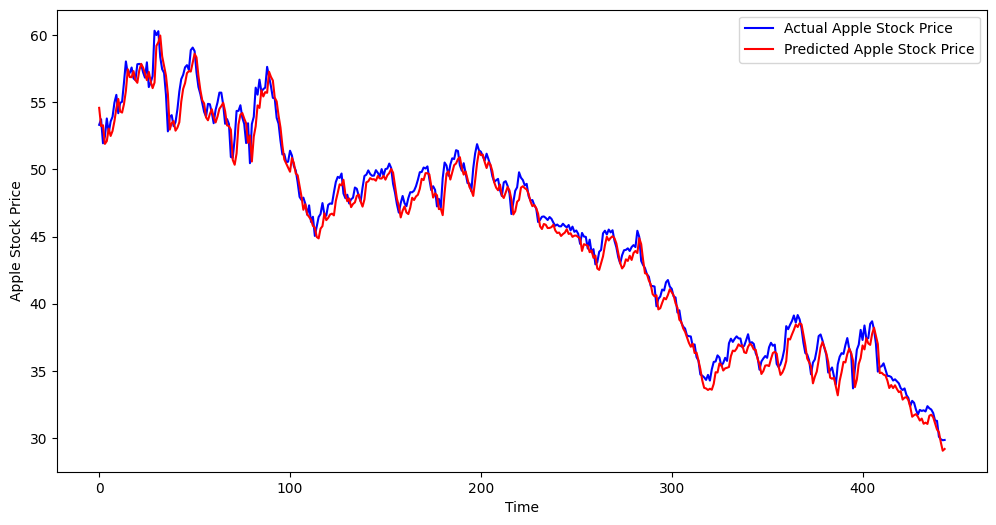

In [36]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predicted vs actual prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, color='blue', label='Actual Apple Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Apple Stock Price')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

**Intepretation:**

The algorithm seems to do a good job at forecasting Apple stock values, particularly when it comes to identifying broad trends and more significant patterns. The model may need to be further tuned, though, as evidenced by the lag and slight variations in capturing extremely short-term changes (e.g., by utilizing more complicated architectures like LSTMs or modifying hyperparameters).

#### **6) Evaluation:**

In [37]:
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.7432405628857313
Root Mean Squared Error (RMSE): 0.9455446631249156


Intepretation:

The MAE of 0.743 indicates that, on average, the model's predictions are off by approximately 0.74 units (likely dollars, if we're working with Apple stock prices). This is a reasonable error for stock price predictions, especially for a single-step RNN model.

The RMSE of 0.946 gives us an understanding of the magnitude of larger errors. Since RMSE penalizes larger errors more heavily, this value shows that the model has a few instances where its predictions deviate more significantly from the actual prices.